<img src="./img/itsoeh.png" width="300" align="center">

# Problemario


Nombre del alumno: Rembrandt Alexander Calva Obregón & Monserrat Aguilar Pérez 


Asignatura: Matemáticas Aplicadas a Comunicaciones

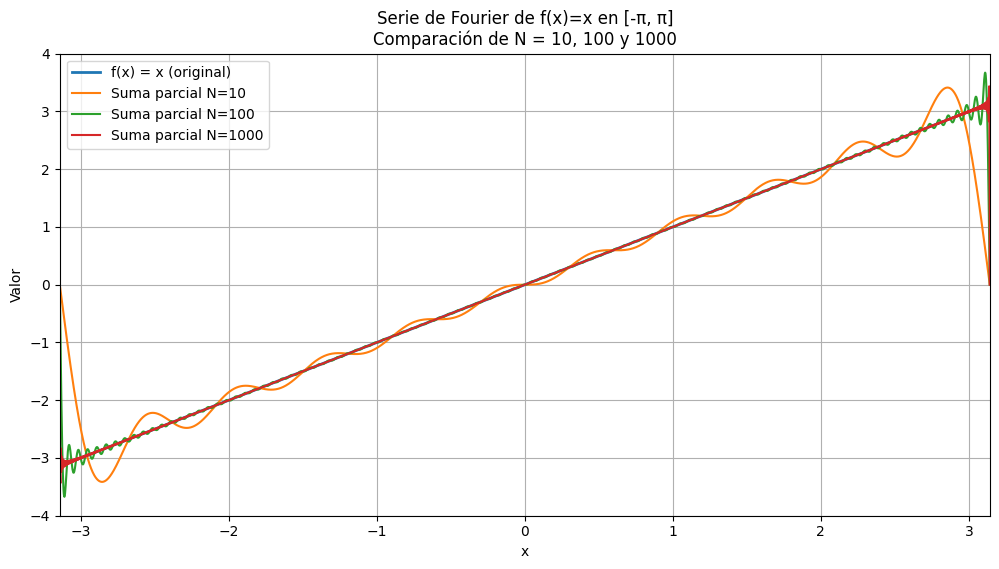

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------
# f(x) = x   en el rango [-pi, pi]
# Serie de Fourier (función impar):
# a0 = 0
# an = 0
# bn = 2*(-1)^(n+1) / n
# ------------------------------------------------------

def f(x):
    return x

# Coeficiente bn analítico
def bn(n):
    return 2 * (-1)**(n + 1) / n

# Suma parcial con N términos
def parcial(N, xs):
    s = np.zeros_like(xs)
    for n in range(1, N+1):
        s += bn(n) * np.sin(n * xs)
    return s

# Rango para graficar
xs = np.linspace(-np.pi, np.pi, 3000)

# Valores de N a comparar
Ns = [10, 100, 1000]

# Graficar
plt.figure(figsize=(12, 6))

# Gráfica de la función original
plt.plot(xs, f(xs), linewidth=2, label='f(x) = x (original)')

# Gráficas de sumas parciales
for N in Ns:
    sN = parcial(N, xs)
    plt.plot(xs, sN, label=f'Suma parcial N={N}')

plt.title('Serie de Fourier de f(x)=x en [-π, π]\nComparación de N = 10, 100 y 1000')
plt.xlabel('x')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xlim(-np.pi, np.pi)
plt.ylim(-4, 4)
plt.show()


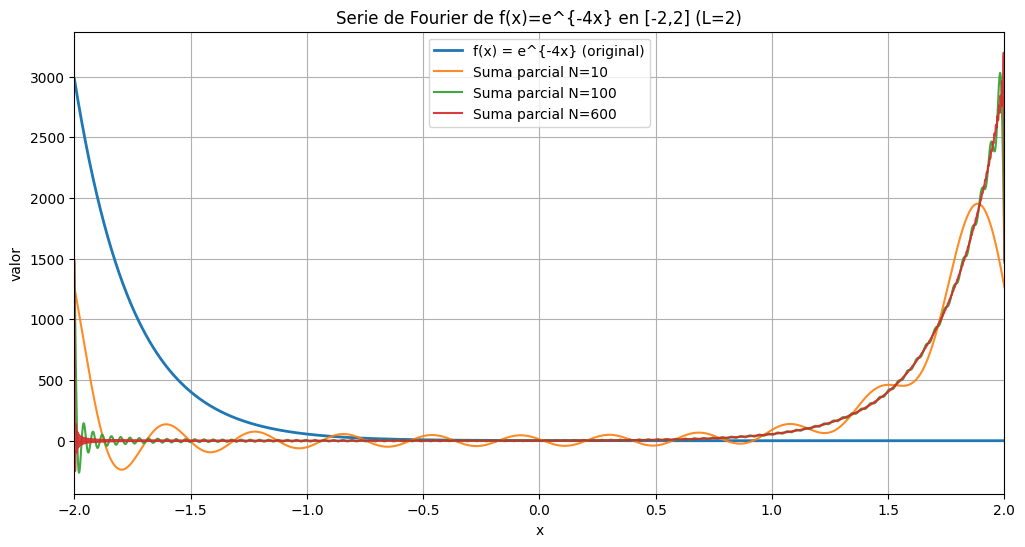

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------
# Fourier series of f(x) = exp(-4x) on [-2,2], L=2
# Beta_n = n*pi/2
# Sumas parciales para N = 10, 100, 600
# ------------------------------------------------------

L = 2.0
Ns = [10, 100, 600]     # <-- actualizado
xs = np.linspace(-L, L, 4000)

# Precompute S and P
S = np.exp(8.0) - np.exp(-8.0)   # e^8 - e^-8
P = np.exp(8.0) + np.exp(-8.0)   # e^8 + e^-8

def beta(n):
    return n * np.pi / 2.0

# a0
a0 = (np.exp(8.0) - np.exp(-8.0)) / 8.0

# Coeficientes an y bn (usando fórmulas derivadas)
def an(n):
    b = beta(n)
    denom = 16.0 + b*b
    cos2b = np.cos(2.0 * b)
    sin2b = np.sin(2.0 * b)
    num = 4.0 * S * cos2b + b * P * sin2b
    return 0.5 * num / denom

def bn_coef(n):
    b = beta(n)
    denom = 16.0 + b*b
    cos2b = np.cos(2.0 * b)
    sin2b = np.sin(2.0 * b)
    num = 4.0 * S * sin2b - b * P * cos2b
    return 0.5 * num / denom

# Suma parcial
def suma_parcial(N, xs):
    s = np.full_like(xs, a0/2.0)   # a0/2
    for n in range(1, N+1):
        an_val = an(n)
        bn_val = bn_coef(n)
        s += an_val * np.cos(beta(n) * xs) + bn_val * np.sin(beta(n) * xs)
    return s

# Función original
def f(x):
    return np.exp(-4.0 * x)

# Graficar
plt.figure(figsize=(12,6))
plt.plot(xs, f(xs), linewidth=2, label='f(x) = e^{-4x} (original)')

for N in Ns:
    sN = suma_parcial(N, xs)
    plt.plot(xs, sN, label=f'Suma parcial N={N}', alpha=0.9)

plt.title('Serie de Fourier de f(x)=e^{-4x} en [-2,2] (L=2)')
plt.xlabel('x')
plt.ylabel('valor')
plt.legend()
plt.grid(True)
plt.xlim(-L, L)
plt.show()



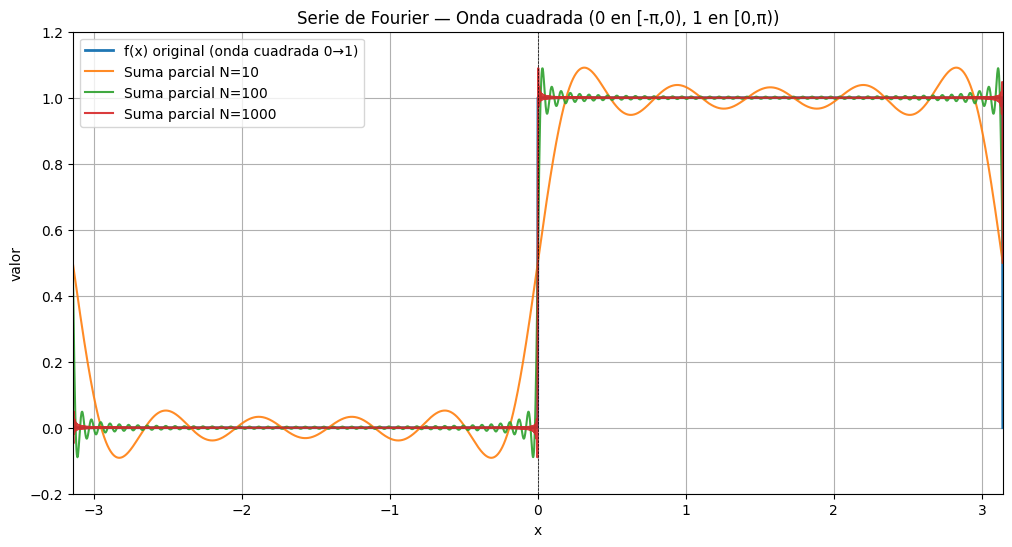

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Onda cuadrada: f(x)=0 para -pi<=x<0, f(x)=1 para 0<=x<pi
# Serie de Fourier: f(x) = 1/2 + (2/pi) * sum_{k=1}^\infty sin((2k-1)x)/(2k-1)
# Graficar sumas parciales N = 10, 100, 600
# ---------------------------------------------------------

L = np.pi
xs = np.linspace(-L, L, 3000)

# Definimos la función por tramos (valor dentro de [-pi,pi))
def f(x):
    # usa np.where para vectores, y reduce residuos en pi
    x_mod = ((x + np.pi) % (2*np.pi)) - np.pi  # mapea al intervalo (-pi, pi]
    return np.where((x_mod >= 0) & (x_mod < np.pi), 1.0, 0.0)

# Coeficientes bn analíticos
def b_n(n):
    if n % 2 == 0:
        return 0.0
    else:
        return 2.0 / (np.pi * n)   # n impar

# Suma parcial con N términos (suma sobre n=1..N)
def suma_parcial(N, xs):
    s = np.full_like(xs, 0.5)  # a0/2 = 1/2
    for n in range(1, N+1):
        bn = b_n(n)
        if bn != 0:
            s += bn * np.sin(n * xs)
    return s

# Valores de N
Ns = [10, 100, 1000]

# Graficar
plt.figure(figsize=(12,6))
plt.plot(xs, f(xs), linewidth=2, label='f(x) original (onda cuadrada 0→1)')

for N in Ns:
    sN = suma_parcial(N, xs)
    plt.plot(xs, sN, label=f'Suma parcial N={N}', alpha=0.9)

plt.title('Serie de Fourier — Onda cuadrada (0 en [-π,0), 1 en [0,π))')
plt.xlabel('x')
plt.ylabel('valor')
plt.legend()
plt.grid(True)
plt.xlim(-np.pi, np.pi)
plt.ylim(-0.2, 1.2)
plt.axvline(0, color='k', linewidth=0.5, linestyle='--')  # línea vertical en x=0
plt.show()


